In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from keras.datasets import imdb
from keras.datasets import reuters
from keras.datasets import boston_housing
from keras import models
from keras import layers
from keras import optimizers
from keras.optimizer_v2 import rmsprop as rmsprop_v2
from tensorflow import keras
from keras import optimizers
from keras import losses
from keras import metrics
import matplotlib.pyplot as plt
# optimizer=keras.optimizers.RMSprop(learning_rate=0.01)

## Classifying movie reviews: a binary classification example
### The IMDB dataset

In [2]:
# Loading the IMDB dataset
# IMDB dataset: a set of 50,000 highly polarized reviews from the
    # Internet Movie Database. They’re split into 25,000 reviews for training and 25,000
    # reviews for testing, each set consisting of 50% negative and 50% positive reviews
# Argument num_words = 10000 means we will only keep the top 10,000 most frequently occurring words in the training data. 
    # Rare words will be discarded. 
    # This allows us to work with vector data of manageable size.
# train_labels and test_labels are lists of 0s and 1s, 
    # 0: negative
    # 1: positive:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
# Because we are restricting ourselves to the top 10,000 most frequent words, 
    # no word index will exceed 10,000:
max([max(sequence) for sequence in train_data])

9999

In [28]:
# # For fun, decode one of these reviews back to English words:
# word_index = imdb.get_word_index() # Reverses it, mapping integer indices to words
# reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # word_index is a dictionary mapping words to an integer index.
# decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]]) # decodes review

In [6]:
# Encoding the integer sequences into a binary matrix
    # can’t feed lists of integers into a neural network, so we turn the lists into tensors by:
        # Pad the lists so that they all have the same length, turn them into an integer 
            # tensor of shape (samples, word_indices), and then use as the first layer in
            # the network a layer capable of handling such integer tensors 
        # One-hot encode the lists to turn them into vectors of 0s and 1s. Then we could use as the 
            # first layer in the network a Dense layer, capable of handling floating-point vector data
    # we will go with second option to vectorize the data
def vectorize_sequences(sequences, dimension=10000): 
    results = np.zeros((len(sequences), dimension)) # Creates an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences): # Sets specific indices of results[i] to 1s
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data) # Vectorized training data
x_test = vectorize_sequences(test_data) # Vectorized test data

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
# vectorize the labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2022-03-03 22:09:41.772711: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# Compiling the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
# Configuring the optimizer
# optimizer=keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
# Using custom losses and metrics
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001), loss=keras.losses.binary_crossentropy, metrics=[keras.metrics.binary_accuracy])

In [13]:
# Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
# model for 20 epochs (20 iterations over all samples in the x_train and y_train tensors), 
    # in mini-batches of 512 samples. At the same time, monitor loss and accuracy on the 10,000 
    # samples that we set apart by passing the validation data as the validation_data argument.
# training model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 7s 161ms/step - loss: 0.5140 - acc: 0.7833 - val_loss: 0.3831 - val_acc: 0.8687
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3000 - acc: 0.9015 - val_loss: 0.3028 - val_acc: 0.8862
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2177 - acc: 0.9283 - val_loss: 0.2828 - val_acc: 0.8874
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1697 - acc: 0.9464 - val_loss: 0.3289 - val_acc: 0.8681
Epoch 5/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1403 - acc: 0.9552 - val_loss: 0.2882 - val_acc: 0.8853
Epoch 6/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1142 - acc: 0.9649 - val_loss: 0.2959 - val_acc: 0.8852
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0939 - acc: 0.9729 - val_loss: 0.3188 - val_acc: 0.8802
Epoch 8/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0772 - 

In [15]:
# the call to model.fit() returns a History object. This object has a member history, 
    # which is a dictionary containing data about everything that happened during training
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

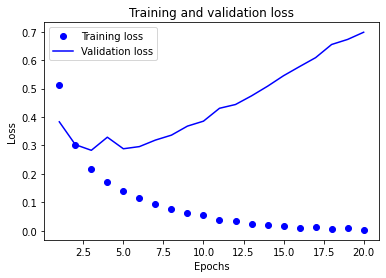

In [16]:
# Plotting the training and validation loss
history_dict = history.history
acc_values = history_dict['acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') # “bo” is for “blue dot.”
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') # “b” is for “solid blue line.”
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# training loss decreases with every epoch,

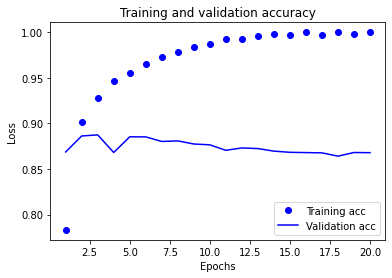

In [17]:
# Plotting the training and validation accuracy
plt.clf() # Clears the figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# training accuracy increases with every epoch
# That’s what you would expect when running gradient descent optimization—the quantity you’re trying to 
    # minimize should be less with every iteration
# overfitting: model that performs better on the training data isn’t necessarily a model that will do
    # better on data it has never seen before

In [18]:
# we want to prevent overfitting, so we will train a new network from scratch for four epochs 
    # and then evaluate it on the test data
# Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 5s 47ms/step - loss: 0.4578 - accuracy: 0.8236
Epoch 2/4
49/49 [==============================] - 2s 39ms/step - loss: 0.2628 - accuracy: 0.9074
Epoch 3/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2012 - accuracy: 0.9293
Epoch 4/4
782/782 [==============================] - 6s 7ms/step - loss: 0.2936 - accuracy: 0.8849


In [56]:
# This naive approach achieves an accuracy of 88%
results

[0.2932710647583008, 0.8831999897956848]

In [57]:
# network is confident for some samples (0.99 or more, or 0.09 or
    # less) but less confident for others (0.7)
model.predict(x_test)

array([[0.25253186],
       [0.99951303],
       [0.95530427],
       ...,
       [0.12318385],
       [0.09822321],
       [0.722928  ]], dtype=float32)

In [58]:
# we want to prevent overfitting, so we will train a new network from scratch for four epochs 
    # and then evaluate it on the test data
# Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 5s 46ms/step - loss: 0.1292 - accuracy: 0.8336
Epoch 2/4
49/49 [==============================] - 2s 31ms/step - loss: 0.0663 - accuracy: 0.9158
Epoch 3/4
49/49 [==============================] - 1s 29ms/step - loss: 0.0502 - accuracy: 0.9361
Epoch 4/4
782/782 [==============================] - 6s 7ms/step - loss: 0.1035 - accuracy: 0.8659


## Classifying newswires: a multiclass classification example
### The Reuters dataset

In [60]:
# Reuters dataset: a set of short newswires and their topics, published by Reuters in 1986.
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [61]:
#  8982 training example
len(train_data)

8982

In [62]:
# 2246 test examples
len(test_data)

2246

In [63]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [64]:
# Decoding newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

565248/550378 [==============================] - 0s 0us/step


In [65]:
# Vectorize/Encoding the data
# cast the label list as an integer tensor
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data) # Vectorized training data
x_test = vectorize_sequences(test_data) # Vectorized testing data

In [66]:
# Vectorize/Encoding the data
# one-hot encoding (categorical encoding)
    # widely used format for categorical data
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels) # Vectorized training data
one_hot_test_labels = to_one_hot(test_labels) # Vectorized testing data

In [67]:
# Model definition
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [68]:
# Compiling the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [69]:
# Setting aside a validation set
    # Set apart 1000 samples in the training data to use as a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [70]:
# Training the model
    #  train the network for 20 epochs.
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 5s 135ms/step - loss: 2.5160 - accuracy: 0.5411 - val_loss: 1.6516 - val_accuracy: 0.6450
Epoch 2/20
16/16 [==============================] - 2s 97ms/step - loss: 1.3707 - accuracy: 0.7126 - val_loss: 1.2716 - val_accuracy: 0.7170
Epoch 3/20
16/16 [==============================] - 1s 60ms/step - loss: 1.0378 - accuracy: 0.7762 - val_loss: 1.1192 - val_accuracy: 0.7570
Epoch 4/20
16/16 [==============================] - 1s 66ms/step - loss: 0.8127 - accuracy: 0.8261 - val_loss: 1.0168 - val_accuracy: 0.7910
Epoch 5/20
16/16 [==============================] - 1s 59ms/step - loss: 0.6472 - accuracy: 0.8631 - val_loss: 0.9736 - val_accuracy: 0.7940
Epoch 6/20
16/16 [==============================] - 1s 71ms/step - loss: 0.5145 - accuracy: 0.8889 - val_loss: 0.9136 - val_accuracy: 0.8110
Epoch 7/20
16/16 [==============================] - 1s 88ms/step - loss: 0.4150 - accuracy: 0.9137 - val_loss: 0.8831 - val_accuracy: 0.8170
Epoch 8/20
1

In [75]:
# the call to model.fit() returns a History object. This object has a member history, 
    # which is a dictionary containing data about everything that happened during training
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

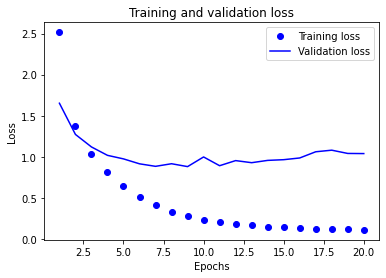

In [71]:
# Plotting the training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

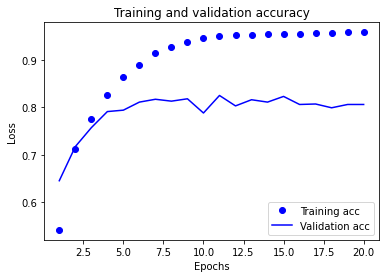

In [77]:
# Plotting the training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# The network begins to overfit after 9/10 epochs.

In [78]:
# Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 4s 133ms/step - loss: 2.5899 - accuracy: 0.4832 - val_loss: 1.7633 - val_accuracy: 0.6380
Epoch 2/9
16/16 [==============================] - 1s 65ms/step - loss: 1.4582 - accuracy: 0.7017 - val_loss: 1.3393 - val_accuracy: 0.7150
Epoch 3/9
16/16 [==============================] - 1s 72ms/step - loss: 1.0883 - accuracy: 0.7632 - val_loss: 1.1377 - val_accuracy: 0.7630
Epoch 4/9
16/16 [==============================] - 2s 108ms/step - loss: 0.8482 - accuracy: 0.8165 - val_loss: 1.0435 - val_accuracy: 0.7710
Epoch 5/9
16/16 [==============================] - 2s 116ms/step - loss: 0.6697 - accuracy: 0.8621 - val_loss: 0.9678 - val_accuracy: 0.7950
Epoch 6/9
16/16 [==============================] - 1s 82ms/step - loss: 0.5379 - accuracy: 0.8914 - val_loss: 0.9208 - val_accuracy: 0.8030
Epoch 7/9
16/16 [==============================] - 1s 90ms/step - loss: 0.4318 - accuracy: 0.9112 - val_loss: 0.9184 - val_accuracy: 0.8050
Epoch 8/9
16/16 [

In [79]:
results

[0.9959371089935303, 0.7934104800224304]

In [80]:
# Generating predictions for new data
predictions = model.predict(x_test)

In [82]:
# Each entry in predictions is a vector of length 46
predictions[0].shape

(46,)

In [81]:
# The coefficients in this vector sum to 1
np.sum(predictions[0])

0.99999994

In [83]:
# The largest entry is the predicted class—the class with the highest probability
np.argmax(predictions[0])

3

In [84]:
# A model with an information bottleneck
    # what happens when you introduce an information bottleneck by having intermediate layers 
    # that are significantly less than 46-dimensional: for example, 4-dimensional
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))
# The network now peaks at ~71% validation accuracy, a 10% absolute drop. This drop
    # is mostly due to the fact that you’re trying to compress a lot of information (enough
    # information to recover the separation hyperplanes of 46 classes) into an intermediate
    # space that is too low-dimensional. The network is able to cram most of the necessary
    # information into these eight-dimensional representations, but not all of it.

Epoch 1/20
63/63 [==============================] - 7s 74ms/step - loss: 3.0671 - accuracy: 0.1776 - val_loss: 2.3830 - val_accuracy: 0.3540
Epoch 2/20
63/63 [==============================] - 2s 37ms/step - loss: 1.8636 - accuracy: 0.6010 - val_loss: 1.5957 - val_accuracy: 0.6580
Epoch 3/20
63/63 [==============================] - 2s 36ms/step - loss: 1.3814 - accuracy: 0.6921 - val_loss: 1.4382 - val_accuracy: 0.6830
Epoch 4/20
63/63 [==============================] - 2s 28ms/step - loss: 1.2214 - accuracy: 0.7155 - val_loss: 1.3832 - val_accuracy: 0.6890
Epoch 5/20
63/63 [==============================] - 2s 26ms/step - loss: 1.1110 - accuracy: 0.7265 - val_loss: 1.3531 - val_accuracy: 0.6980
Epoch 6/20
63/63 [==============================] - 2s 27ms/step - loss: 1.0174 - accuracy: 0.7425 - val_loss: 1.3340 - val_accuracy: 0.6920
Epoch 7/20
63/63 [==============================] - 2s 25ms/step - loss: 0.9371 - accuracy: 0.7514 - val_loss: 1.3163 - val_accuracy: 0.6940
Epoch 8/20
63

## Predicting house prices: a regression example
### The Boston Housing Price dataset

In [86]:
# Boston Housing Price dataset: predict the median price of homes in a given Boston suburb in the
    # mid-1970s, given data points about the suburb at the time, such as the crime rate, the
    # local property tax rate, and so on
# Loading the Boston housing dataset
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 1us/step


In [87]:
train_data.shape

(404, 13)

In [89]:
test_data.shape

(102, 13)

In [90]:
# prices are typically between $10,000 and $50,000
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [93]:
# It would be problematic to feed into a neural network values that all take wildly different ranges
# Normalizing the data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [94]:
# Model definition
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [95]:
# K-fold validation
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] # Prepares the validation data: data from partition #k
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0) # Prepares the training data: data from all other partitions
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]],axis=0)
    model = build_model() # Builds the Keras model (already compiled)
    model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0) # Trains the model (in silent mode, verbose = 0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0) # Evaluates the model on the validation data
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [96]:
all_scores
# different runs do indeed show rather different validation scores, from 2.0 to 2.8.
    # The average (2.6) is a much more reliable metric than any single score—that’s the
    # entire point of K-fold cross-validation. In this case, you’re off by $2600 on average,
    # which is significant considering that the prices range from $10,000 to $50,000.

[2.071929454803467, 2.8327410221099854, 2.794664144515991, 2.6851916313171387]

In [97]:
np.mean(all_scores)

2.5961315631866455

In [102]:
# try training the network a bit longer: 500 epochs
# Saving the validation logs at each fold
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] # Prepares the validation data: data from partition #k
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0) # # Prepares the training data: data from all other partitions
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]],axis=0)
    model = build_model() # Builds the Keras model (already compiled)
    history = model.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets),epochs=num_epochs, batch_size=1, verbose=0) # Trains the model (in silent mode, verbose = 0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [103]:
# the call to model.fit() returns a History object. This object has a member history, 
    # which is a dictionary containing data about everything that happened during training
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [104]:
# Building the history of successive mean K-fold validation scores
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

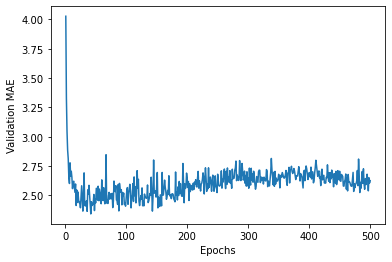

In [105]:
# Plotting validation scores
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

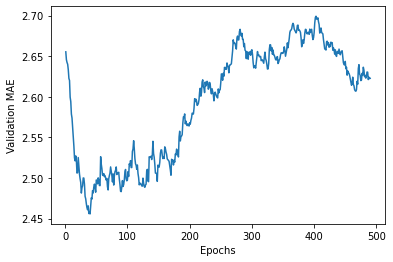

In [106]:
# Plotting validation scores, excluding the first 10 data points
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [107]:
# Training the final model
model = build_model() # Gets a fresh, compiled model
model.fit(train_data, train_targets,epochs=80, batch_size=16, verbose=0) # Trains it on the entirety of the data
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 6ms/step - loss: 18.7271 - mae: 2.9375


In [108]:
test_mae_score

2.93747615814209